In [1]:
import openmc
import openmc.deplete
import matplotlib.pyplot as plt

In [6]:
filename = "./depletion_results/barc-v2-5-percent-waste-lowfidelity"
result = openmc.deplete.Results(filename+'/depletion_results.h5')

In [7]:
problem_nuclides = ["C14","Ni59","Nb94","I129","H3","Co60"]
actinides = ["U238","U235","Pu239","Pu240","Pu241","Cm242","Am241"]
fission_products = ['Y90',"Sr90","Cs137","Tc99"]
test = ["Sr90","Y90"]

try:
    times, activities = result.get_activity(mat="15",by_nuclide=True)
    times, total_activity = result.get_activity(mat="15")
except KeyError:
    times, activities = result.get_activity(mat="12",by_nuclide=True)
    times, total_activity = result.get_activity(mat="12")
    print("Material not recognized, check id in materials.xml")

activities[0]
max_key = max(activities[0], key=activities[0].get)

max_key

Material not recognized, check id in materials.xml


'Y90'

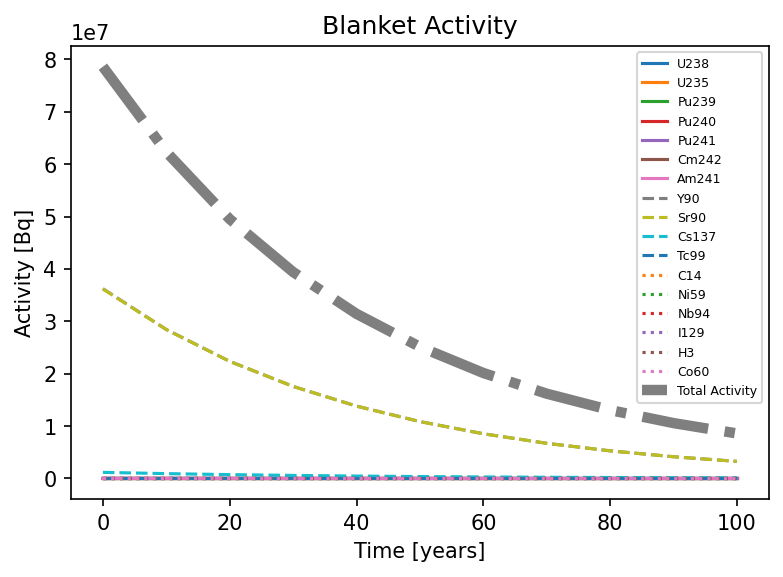

In [8]:
fig, ax = plt.subplots(dpi=150)

for i in actinides:
    values = [ia[i] for ia in activities]
    ax.plot(times/60/60/24/365, values, label=i)
    
for i in fission_products:
    values = [ia[i] for ia in activities]
    ax.plot(times/60/60/24/365, values, label=i,ls="--")

for i in problem_nuclides:
    values = [ia[i] for ia in activities]
    ax.plot(times/60/60/24/365, values, label=i,ls=":")

ax.plot(times/60/60/24/365,total_activity,label="Total Activity",ls="-.", lw=5)
ax.legend(fontsize=6)
#ax.set_ylim(1e0,1e8)
plt.xlabel("Time [years]")
plt.ylabel("Activity [Bq]")
plt.title("Blanket Activity")
plt.savefig("old.png")

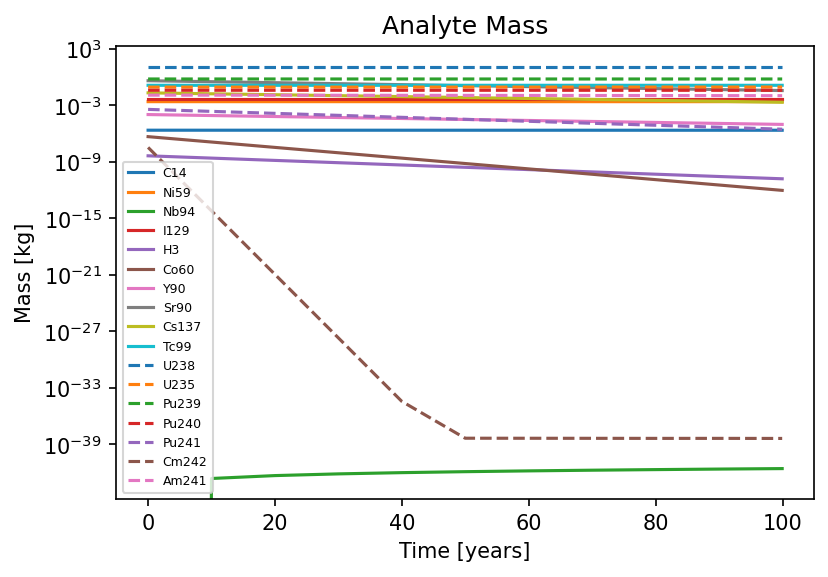

In [11]:
# plot analyte masses
fig, ax = plt.subplots(dpi=150)
for i in problem_nuclides+fission_products:
    times, mass = result.get_mass(mat='12', nuc=i, time_units='a', mass_units='kg')
    ax.semilogy(times, mass, label=i)
for i in actinides:
    times, mass = result.get_mass(mat='12', nuc=i, time_units='a', mass_units='kg')
    ax.semilogy(times, mass, label=i, ls="--")
ax.set_title("Analyte Mass")
ax.set_xlabel("Time [years]")
ax.set_ylabel("Mass [kg]")
ax.legend(fontsize=6)
plt.show()

In [ ]:
times, heat = result.get_decay_heat(mat='15')
fig, ax = plt.subplots(dpi=150)
ax.plot(times/60/60/24/365, heat)

In [ ]:
# Export material 
from barc_blanket.materials.waste_classification import sum_of_fractions
depleted_material = result.export_to_materials(burnup_index=9, path=filename+"/materials.xml")
depleted_material
sum_of_fractions(depleted_material[5],2,3)


/home/hallj/.local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=10.
  warn(msg, IDWarning)
/home/hallj/.local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=12.
  warn(msg, IDWarning)


Time: 0 years
Table 1 sum of fractions: 57.10
Table 2 sum of fractions: 1.01
Time: 10 years
Table 1 sum of fractions: 56.62
Table 2 sum of fractions: 0.80
Time: 20 years
Table 1 sum of fractions: 56.15
Table 2 sum of fractions: 0.63
Time: 30 years
Table 1 sum of fractions: 55.68
Table 2 sum of fractions: 0.49
Time: 40 years
Table 1 sum of fractions: 55.22
Table 2 sum of fractions: 0.39
Time: 50 years
Table 1 sum of fractions: 54.76
Table 2 sum of fractions: 0.31
Time: 60 years
Table 1 sum of fractions: 54.32
Table 2 sum of fractions: 0.24
Time: 70 years
Table 1 sum of fractions: 53.88
Table 2 sum of fractions: 0.19
Time: 80 years
Table 1 sum of fractions: 53.45
Table 2 sum of fractions: 0.15
Time: 90 years
Table 1 sum of fractions: 53.04
Table 2 sum of fractions: 0.12
Time: 100 years
Table 1 sum of fractions: 52.63
Table 2 sum of fractions: 0.09
Time: 0 years
Table 1 sum of fractions: 0.00
Table 2 sum of fractions: 0.00
Time: 10 years
Table 1 sum of fractions: 0.00
Table 2 sum of fract

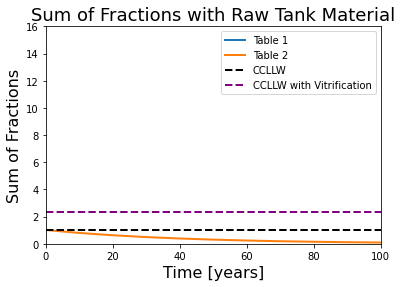

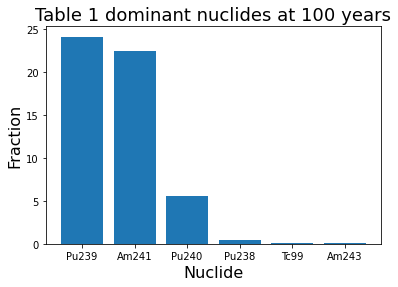

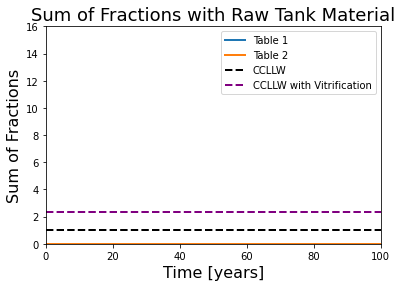

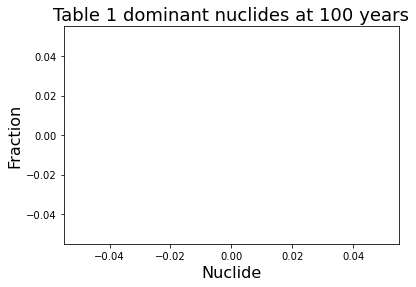

In [5]:
import openmc

from barc_blanket.materials.blanket_depletion import postprocess_coupled_depletion, plot_results
from barc_blanket.utilities import working_directory, CROSS_SECTIONS, CHAIN_FILE

openmc.config['cross_sections'] = CROSS_SECTIONS
openmc.config['chain_file'] = CHAIN_FILE

def main():
    with working_directory(filename):
        postprocess_coupled_depletion(5, 6)
        plot_results()
main()